# Comparativa Gráfica de Lenguas

Comparación de forma gráfica y numérica,  de textos en inglés, español y francés. Para realizar esta comparación, se utilizan como datos de entrada los resultados del ejercicio del clasificador de idioma.

### Gráfica
- Una vez obtenida la clasificación de idiomas, mediante los ngramas
- Se obtiene la frecuencia relativa de las unidades de estudio (ngramas) para cada idioma
- Usando como base en el eje X el vocabulario ordenado por frecuencia de los ngramas en español y en el Y la frecuencia relativa de cada elemento

### Correlación de Pearson
- Utilizando la librería Pandas, se crea un dataframe colocando las frecuencias relativas en el mismo orden que la gráfica (Para tener las frecuencias relativas del mismo ngrama en distintos idiomas en cada fila del dataframe)
- Se obtiene la matriz de correlación de las variables (En este caso las frecuencias relativas del dataframe)

Se realizó los mismos pasos para otro texto

### Observaciones
* A partir de las gráficas se observa que en los tres idiomas la distribución es parecida en cuanto a la frecuencia relativa. Entre más frecuencia se utiliza una unidad de lenguaje, es más probable que se utilice en otro lenguaje de los estudiados.
* A partir de los resultados de las matrices de correlación, se puede observar en ambos casos una mayor correlación entre las frecuencias relativas de los ngramas del español y francés, lo cual podría indicar que las unidades de lenguaje usadas se parecen más.

## Texto: Declaración universal de derechos humanos

In [ ]:
# Librerias
import requests
from bs4 import BeautifulSoup

from collections import Counter
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# El objetivo de esta celda era crear una clase 'texto', para poder solo cambiar el texto 
# de entrada, pero se tuvo problemas y por tiempo no pude acabar la clase 'texto', pero la funcionalidad
# esta igual

dec_es =''
dec_en =''
dec_fr =''

web_scrapping = True

# Obtener ngramas

def get_ngrams(text: str, n: int, pad=False) -> list:
  extra = n - 1
  if pad:
    text = f"{'-' * (n - 1)}{text}{'-' * extra}"
  return [text[i:i + n] for i in range(len(text) - extra)]

def get_declaration(lang: str) -> str:
  

  url = (
      f"https://www.un.org/{lang}/"
      "universal-declaration-human-rights/index.html"
  )
  r = requests.get(url)
  r.encoding = "utf-8"
  html = r.text
  r.close()
  soup = BeautifulSoup(html)
  declaracion = soup.find_all("div", class_="col-md-12")[1]
  
  return declaracion.text

def join_feats(feat_dict: dict) -> Counter:
  total = Counter()
  for v in feat_dict.values():
    total += Counter(v)
  return total

def relative_frecuency(feat_dict: dict) -> Counter:
  #total = Counter()
  new_dict = feat_dict.copy()
  total_ngrams = sum(new_dict.values())
  #print(total_ngrams)
  #print(new_dict.values())
  for k in new_dict.keys():
    new_dict[k] = new_dict[k]/total_ngrams
    #total = v/len(feat_dict.keys())
  return new_dict
dec_es='d'
get_ngrams(dec_es,1)

if web_scrapping:
  dec_es = get_declaration("es")
  dec_en = get_declaration("en")
  dec_fr = get_declaration("fr")

get_ngrams(dec_es,1)
# Se obtienen los ngramas (1,4) de cada versión de texto
es_feat = {f"{n}": get_ngrams(dec_es,n) for n in range(1, 4)}
en_feat = {f"{n}": get_ngrams(dec_en, n) for n in range(1, 4)}
fr_feat = {f"{n}": get_ngrams(dec_fr, n) for n in range(1, 4)}

# Counter({' ': 1969, 'e': 1267
total_es = join_feats(es_feat)
total_en = join_feats(en_feat)
total_fr = join_feats(fr_feat)

common_es = total_es.most_common(30)
common_en = total_en.most_common(30)
common_fr = total_fr.most_common(30)




# Numero de distintos ngramas
num_es = len(total_es.keys())
num_en = len(total_en.keys())
num_fr = len(total_fr.keys())

vocabulario_total = set(total_es.keys() | total_en.keys() | total_fr.keys())
common_feats = set(total_es.keys() & total_en.keys() & total_fr.keys())

rfrec_es = relative_frecuency(total_es)
rfrec_en = relative_frecuency(total_en)
rfrec_fr = relative_frecuency(total_fr)

tup_rfrec_es =sorted(rfrec_es.items(), key=itemgetter(1))
x,y_es = zip(*tup_rfrec_es)
y_en = ()
for v in x:
  y_en = y_en +(rfrec_en[v],)

y_fr = ()
for v in x:
  y_fr = y_fr +(rfrec_fr[v],)

def rfrecuency_graph(n,x,y_es,y_en,y_fr): # n = numero de ngramas a mostrar en la gráfica
  print(list(x))
  print(y_en)
  plt.figure(figsize=(15,15))
  plt.plot(x[-n:], y_es[-n:],color='r')
  plt.plot(x[-n:],y_en[-n:],color='y')
  plt.plot(x[-n:],y_fr[-n:],color='g')


def rfrecuency_graph2(x,y_es,y_en,y_fr):
  plt.figure(figsize=(15,15))
  plt.plot(x, y_es,color='r')
  plt.scatter(x,y_en,color='y')
  plt.scatter(x,y_fr,color='g')

dic_frec = {"en":list(y_en),"es":list(y_es),"fr" : list(y_fr)}
df_frec = df = pd.DataFrame(dic_frec)

def correlation_matrix(df ):
  return df.corr(method="pearson")



In [ ]:
print(common_es)
print(common_en)
print(common_fr)


[(' ', 1969), ('e', 1267), ('a', 1026), ('o', 821), ('i', 726), ('n', 692), ('s', 665), ('r', 653), ('d', 592), ('l', 524), ('c', 504), ('t', 441), ('a ', 339), ('u', 319), ('e ', 296), ('de', 276), (' d', 266), ('s ', 256), (' de', 241), ('o ', 237), ('p', 236), ('en', 222), ('er', 220), ('m', 208), (' l', 188), (' e', 173), ('ci', 169), ('n ', 165), (' p', 164), ('es', 164)]
[(' ', 1684), ('e', 1037), ('t', 788), ('o', 702), ('n', 691), ('i', 689), ('a', 661), ('r', 602), ('s', 453), ('h', 440), ('l', 392), ('e ', 330), ('d', 317), ('c', 289), (' t', 245), (' a', 234), ('f', 222), ('th', 190), ('u', 187), ('on', 187), ('s ', 184), ('m', 181), ('he', 173), ('an', 172), ('d ', 170), (' o', 166), ('y', 165), ('g', 162), ('ti', 159), ('p', 150)]
[(' ', 1999), ('e', 1343), ('t', 833), ('i', 784), ('n', 747), ('s', 722), ('a', 668), ('r', 623), ('o', 616), ('l', 535), ('e ', 510), ('u', 496), ('d', 426), (' d', 338), ('c', 326), ('s ', 323), ('t ', 267), ('é', 257), ('on', 245), ('p', 243)

['/', 'S', 'U', 'R', ' 7', '70', 'm ', ' 6', '68', 'm,', '45', '50', '41', '"d', 'r;', 'Pu', 'éa', 'az', 'íp', 'és', 'fl', 'Lu', 'ei', 'cí', 'íf', 'Al', '20', '00', '06', '6/', '/0', '07', '7 ', 'Pr', 'Di', 'ño', 'có', '2,', ',4', '48', '.7', '7\u200b', 's:', 'fr', 'z,', 'bd', 'eñ', 'As', 'í,', 'n)', 'zq', '(4', '(3', '3)', 'o:', ' 3', '4)', ' 5', '5-', 'Au', 'sq', 's\n', '\nG', 'Ca', '(i', '1 ', 'lg', ' S', 'Si', 'íb', 'o;', 'pp', 's)', '\nC', 'xp', 'r:', '(l', '"C', 'Ci', 'he', 'tú', 'úa', '(s', 'd)', ').', '\nU', 'Un', 'sá', 'Ac', ' 9', '90', '15', '5 ', 'km', 'm.', '.8', '8\u200b', '\u200b9', '9\u200b', '\u200b1', '0\u200b', 'lr', 'kg', 'íq', '11', '1\u200b', 'ío', 'hi', '2\u200b', 'Pe', ',1', '13', '3\u200b', 'd.', 'uz', 'af', '\nR', 'Re', 'n\n', 'ró', 'óx', 'áp', 'Ev', 'rv', 'aé', 'eo', 'rn', 'e\n', ' 8', '\nT', 'Ti', 'og', 'uá', 'té', 'ofi', 'go.', 'pra', ' u ', 'u o', ' ci', 'irc', 'rcu', 'cun', 'unf', 'a 7', ' 70', '70 ', '0 c', 'cm ', 'm y', 'a 6', ' 68', '68 ', '8 c', 'cm,',

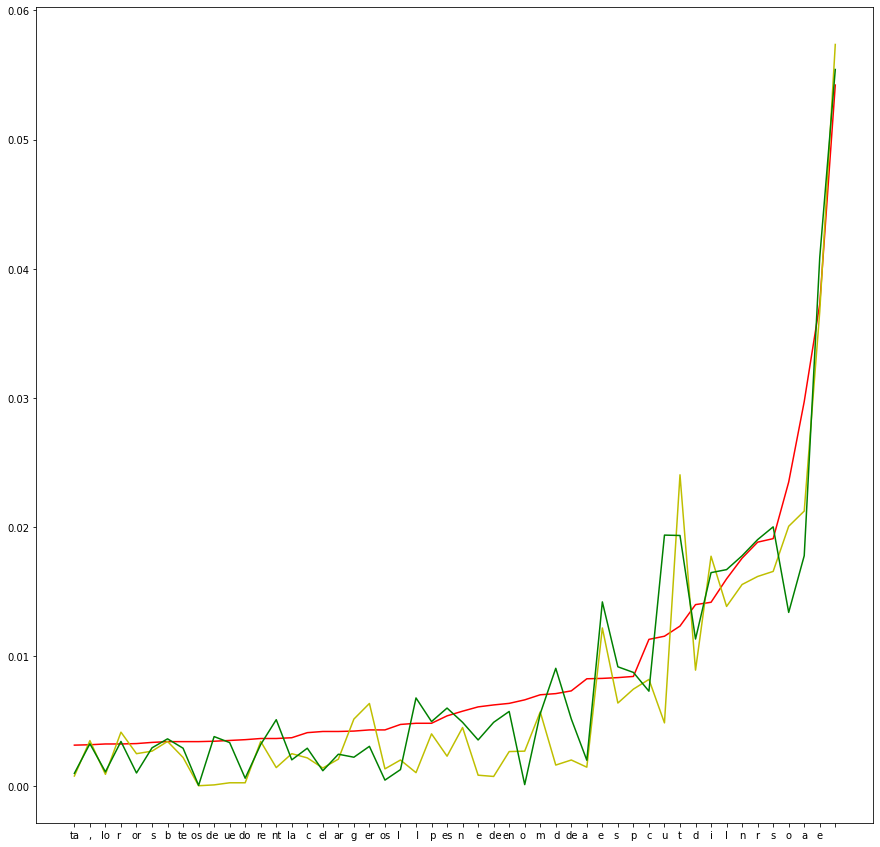

In [ ]:
# 50 primeros ngramas más frecuentes en español, comparados con su frecuencia en francés e inglés
rfrecuency_graph(50,x,y_es,y_en,y_fr)

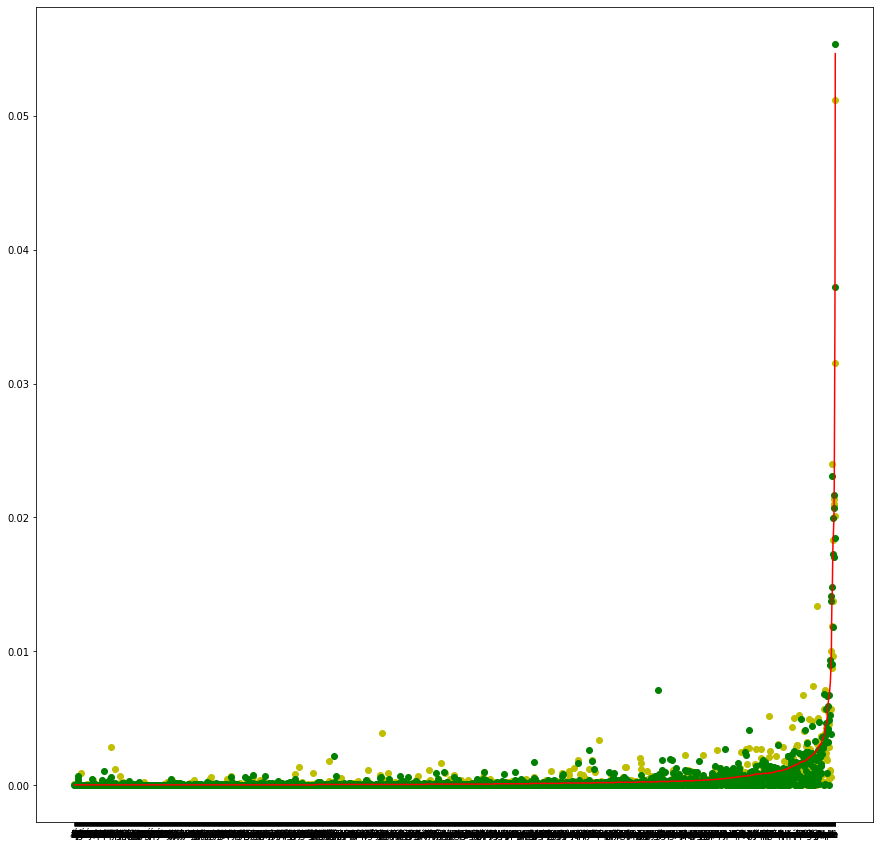

In [ ]:
rfrecuency_graph2(x,y_es,y_en,y_fr)

Correlación de Pearson

In [ ]:
correlation_matrix(df_frec)

,en,es,fr
en,1.000000,0.923259,0.935923
es,0.923259,1.000000,0.948907
fr,0.935923,0.948907,1.000000


# Texto: Fútbol de wikipedia

In [ ]:
# El objetivo de esta celda era crear una clase 'texto', para poder solo cambiar el texto 
# de entrada, pero se tuvo problemas y por tiempo no pude acabar la clase, pero la funcionalidad
# esta igual

# Español
f = open("es_fut.txt", "r")
espaniol = f.read()

# Ingles
f = open("en_fut.txt", "r")
ingles = f.read()
#Frances
f = open("fr_fut.txt", "r")
frances = f.read()


dec_es = espaniol
dec_en =ingles
dec_fr =frances

web_scrapping = False



if web_scrapping:
  dec_es = get_declaration("es")
  dec_en = get_declaration("en")
  dec_fr = get_declaration("fr")

get_ngrams(dec_es,1)
# Se obtienen los ngramas (1,4) de cada versión de texto
es_feat = {f"{n}": get_ngrams(dec_es,n) for n in range(1, 4)}
en_feat = {f"{n}": get_ngrams(dec_en, n) for n in range(1, 4)}
fr_feat = {f"{n}": get_ngrams(dec_fr, n) for n in range(1, 4)}

# Counter({' ': 1969, 'e': 1267
total_es = join_feats(es_feat)
total_en = join_feats(en_feat)
total_fr = join_feats(fr_feat)

print(total_es)

common_es = total_es.most_common(30)
common_en = total_en.most_common(30)
common_fr = total_fr.most_common(30)

# Numero de distintos ngramas
num_es = len(total_es.keys())
num_en = len(total_en.keys())
num_fr = len(total_fr.keys())

vocabulario_total = set(total_es.keys() | total_en.keys() | total_fr.keys())
common_feats = set(total_es.keys() & total_en.keys() & total_fr.keys())

rfrec_es = relative_frecuency(total_es)
rfrec_en = relative_frecuency(total_en)
rfrec_fr = relative_frecuency(total_fr)

tup_rfrec_es =sorted(rfrec_es.items(), key=itemgetter(1))
x,y_es = zip(*tup_rfrec_es)
y_en = ()
for v in x:
  y_en = y_en +(rfrec_en[v],)

y_fr = ()
for v in x:
  y_fr = y_fr +(rfrec_fr[v],)



dic_frec = {"en":list(y_en),"es":list(y_es),"fr" : list(y_fr)}
df_frec = df = pd.DataFrame(dic_frec)





Counter({' ': 1795, 'e': 1234, 'a': 984, 'o': 778, 's': 633, 'r': 624, 'n': 583, 'l': 530, 'i': 470, 'd': 464, 't': 409, 'u': 383, 'c': 375, 'p': 280, 's ': 277, 'e ': 275, 'a ': 274, 'de': 243, ' d': 236, 'm': 233, 'o ': 220, 'en': 211, ' de': 207, ' e': 202, 'n ': 191, 'es': 179, ' l': 160, ' p': 160, 'l ': 157, 'er': 143, 'os': 143, 'g': 140, 'el': 139, 'ar': 139, ' c': 136, 'la': 123, 're': 121, 'nt': 121, 'do': 118, 'ue': 116, 'de ': 114, 'b': 113, 'te': 113, 'os ': 113, ' s': 111, 'or': 108, 'lo': 107, 'r ': 107, ',': 105, 'ta': 104, ', ': 103, 'es ': 102, 'el ': 99, 'ad': 98, 'ci': 98, ' a': 97, 'al': 91, 'po': 89, 'ca': 89, 'j': 87, 'ra': 87, 'on': 87, 'an': 87, 'ro': 85, 'se': 78, 'f': 76, 'q': 76, 'qu': 76, ' la': 76, 'co': 74, 'as': 73, '.': 70, 'un': 70, ' m': 70, ' el': 69, ' j': 68, 'ju': 68, ' ju': 68, 'la ': 68, ' u': 65, 'ado': 65, 'y': 63, 'en ': 63, 'pa': 62, 'ent': 62, 'ti': 61, 'am': 60, ' co': 60, 'si': 59, 'tr': 59, 'ga': 58, 's d': 58, 'que': 58, 'v': 57, 'st': 

['/', 'S', 'U', 'R', ' 7', '70', 'm ', ' 6', '68', 'm,', '45', '50', '41', '"d', 'r;', 'Pu', 'éa', 'az', 'íp', 'és', 'fl', 'Lu', 'ei', 'cí', 'íf', 'Al', '20', '00', '06', '6/', '/0', '07', '7 ', 'Pr', 'Di', 'ño', 'có', '2,', ',4', '48', '.7', '7\u200b', 's:', 'fr', 'z,', 'bd', 'eñ', 'As', 'í,', 'n)', 'zq', '(4', '(3', '3)', 'o:', ' 3', '4)', ' 5', '5-', 'Au', 'sq', 's\n', '\nG', 'Ca', '(i', '1 ', 'lg', ' S', 'Si', 'íb', 'o;', 'pp', 's)', '\nC', 'xp', 'r:', '(l', '"C', 'Ci', 'he', 'tú', 'úa', '(s', 'd)', ').', '\nU', 'Un', 'sá', 'Ac', ' 9', '90', '15', '5 ', 'km', 'm.', '.8', '8\u200b', '\u200b9', '9\u200b', '\u200b1', '0\u200b', 'lr', 'kg', 'íq', '11', '1\u200b', 'ío', 'hi', '2\u200b', 'Pe', ',1', '13', '3\u200b', 'd.', 'uz', 'af', '\nR', 'Re', 'n\n', 'ró', 'óx', 'áp', 'Ev', 'rv', 'aé', 'eo', 'rn', 'e\n', ' 8', '\nT', 'Ti', 'og', 'uá', 'té', 'ofi', 'go.', 'pra', ' u ', 'u o', ' ci', 'irc', 'rcu', 'cun', 'unf', 'a 7', ' 70', '70 ', '0 c', 'cm ', 'm y', 'a 6', ' 68', '68 ', '8 c', 'cm,',

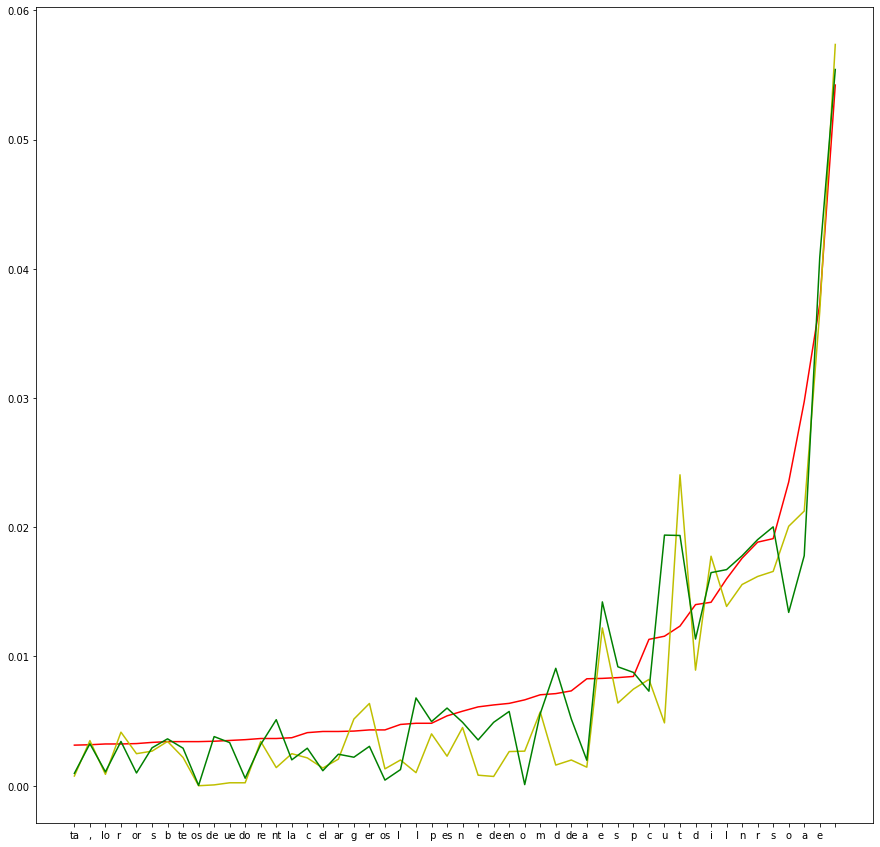

In [ ]:
rfrecuency_graph(50,x,y_es,y_en,y_fr)

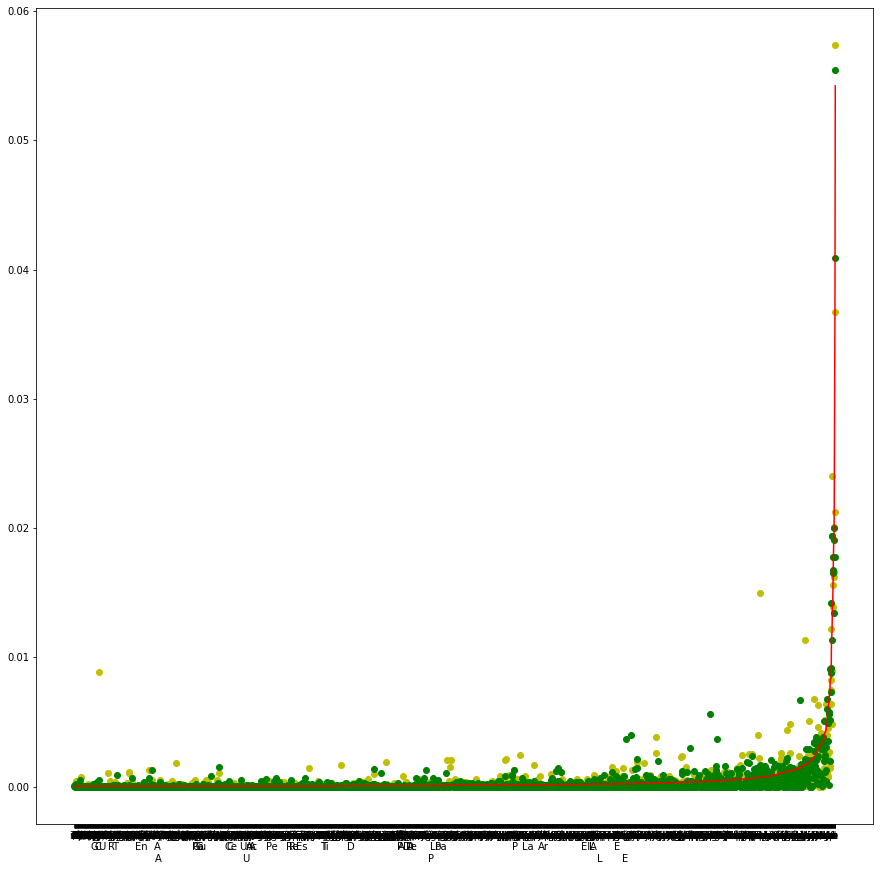

In [ ]:
rfrecuency_graph2(x,y_es,y_en,y_fr)

In [ ]:
correlation_matrix(df_frec)

,en,es,fr
en,1.000000,0.915149,0.922821
es,0.915149,1.000000,0.946243
fr,0.922821,0.946243,1.000000
